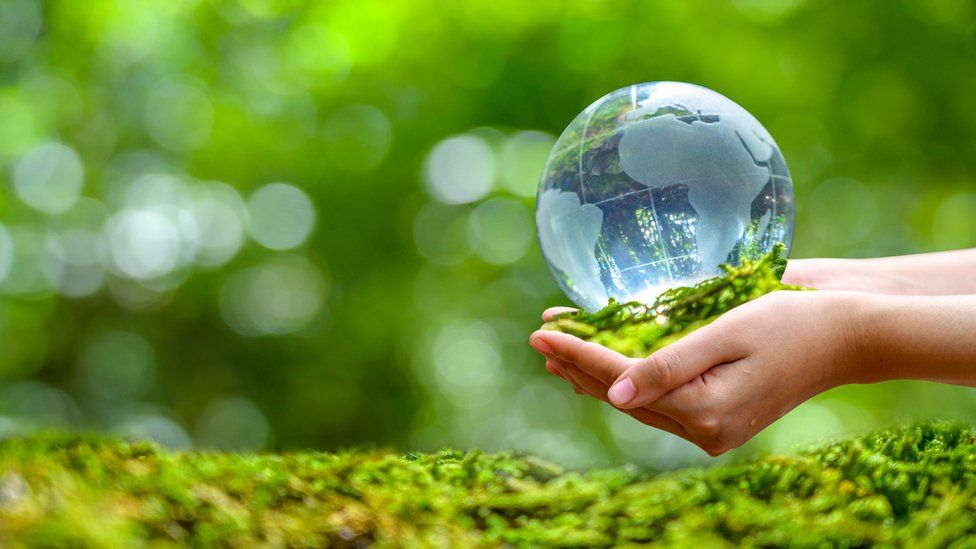

# <b><u> Project Title : EDSA - Climate Change Belief Analysis 2021 </u></b>

# <u> Objective: Predict an individual’s belief in climate change based on historical tweet data

# <u> Evaluation: Weighted F1-score. Prediction of an individual's climate change sentiment class

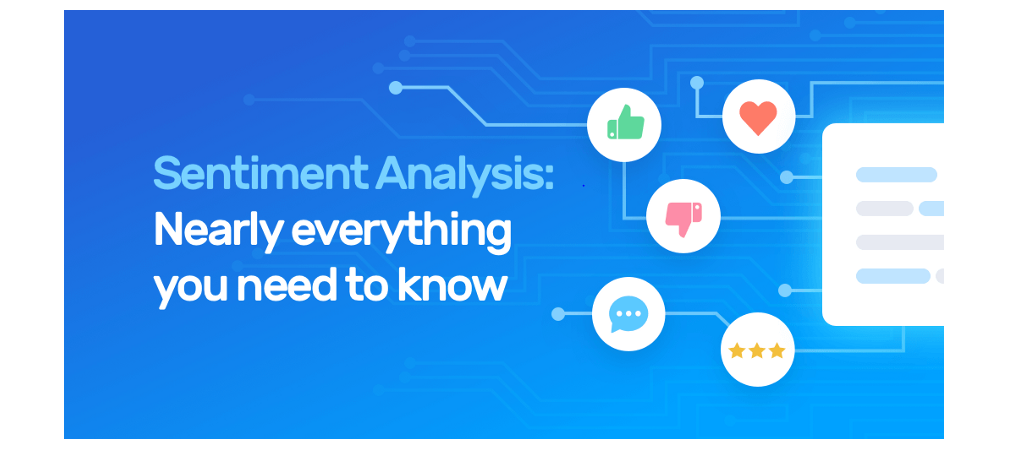

# <u> Authors :- 
## Iddo Smith 👨‍💻 💻 🆒
## Katleho Moketo 👨‍💻 💻 🆒
## Maxwell Munzhedzi 👨‍💻 💻 🆒
## Precious Chauke 👩‍💻 💻 🆒
## Richard Malahlela 👨‍💻 💻 🆒

# <u> **Data Description**

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

**Class Description:**

* **2 News:** the tweet links to factual news about climate change 
* **1 Pro:** the tweet supports the belief of man-made climate change 
* **0 Neutral:** the tweet neither supports nor refutes the belief of man-made climate change 
* **-1 Anti:** the tweet does not believe in man-made climate change 

**Variable definitions:**
**Columns:**

* **sentiment:** Sentiment of tweet 
* **message:** Tweet body 
* **tweetid:** Twitter unique id 

**Files available for download:**
* **train.csv** - You will use this data to train your model. 
* **test.csv** - You will use this data to test your model. 
* **SampleSubmission.csv** - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the tweetid's must be correct.

# ======-------@TEAM AM5------=====--------@CLIMATE CHANGE-------=====

# Workflow

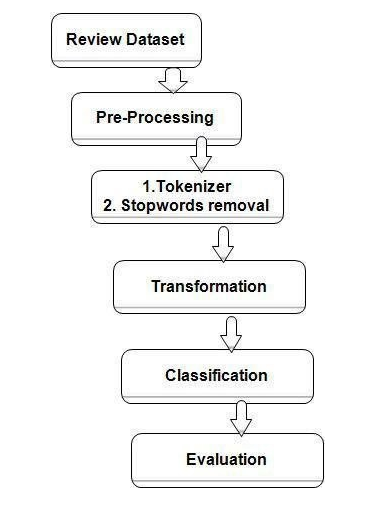

# IMPORTS

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
special = string.punctuation 
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
import gensim
#from gensim.models.deprecated.doc2vec import LabeledSentence
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

#Importing other libraries
from fastai.text.all import *
from collections import defaultdict
from collections import  Counter
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english')) 
import nltk
nltk.download('wordnet')

C:\Users\Maxwell\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxwell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maxwell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# <u>LOAD DATA 

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# <u>**REVIEWING OUR DATASET**

In [3]:
train_df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [5]:
train_df.shape

(15819, 3)

In [6]:
# There are 4 unique sentiment types in our dataset
train_df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

### Going deeper into tweet and sentiment.

In [7]:
train_df[train_df['sentiment']==1]

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954
5,1,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577
...,...,...,...
15807,1,"#scottpruit climate change comments would be like NASA saying, 'The moon landing is complicated, a hoax or not? further study is needed.”",447067
15811,1,RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦,426353
15812,1,RT @SierraClub: 2016: hottest year in history. Also in 2016: 182 Members of Congress denied climate change is real. https://t.co/XMOvALz3c9…,989478
15813,1,RT @thinkprogress: EPA head falsely claims carbon emissions aren’t the cause of global warming\nhttps://t.co/owbqKlSyMx https://t.co/i19vAgE…,442853


In [8]:
train_df[train_df['sentiment']==2]

,sentiment,message,tweetid
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
12,2,"RT @tveitdal: We only have a 5 percent chance of avoiding ‘dangerous’ global warming, a study finds https://t.co/xUBTqNxhkK https://t.co/of…",454673
14,2,"Fossil fuel giant ExxonMobil ‘misled’ the public about climate change, Harvard academics conclude https://t.co/ofc2WSu4EX",658092
26,2,Bangladesh confronting climate change head on https://t.co/MTqeNBQDUt https://t.co/itgkUxgEfg,365291
32,2,RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…,143471
...,...,...,...
15802,2,Michael Bloomberg to world leaders: ignore Trump on climate change https://t.co/XcuD4Ph6py,585908
15803,2,"Suicides of nearly 60,000 Indian farmers linked to climate change, study claims\n\nhttps://t.co/XWXMx5h4U5",296403
15805,2,RT @GrindTV: New head of EPA says climate change not caused primarily by carbon dioxide https://t.co/Kl8fcjGOeL,830383
15809,2,The quest to capture and store carbon — and slow climate change — just reached a new milestone… https://t.co/O1jLyeqLgt,705048


In [9]:
train_df[train_df['sentiment']==0]

,sentiment,message,tweetid
19,0,Calum: *tweets abt reunitingish w the cast*\n-sees replies begging him to come to their countries-\nCalum: *goes back to rting climate change*,547924
22,0,"we also met this guy, he let us in on some truth about climate change and gay people not existing https://t.co/Q7yOMcMZaj",67545
30,0,@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice,365051
39,0,We’ ve dealt with simple issues like climate change and energy policy. Now the complex issues. Mal vs Tones. #qanda,403368
43,0,"RT @andrewsharp: Win probability is bullshit man. I saw the NBA Finals and that's when I knew, global warming isn't real",326916
...,...,...,...
15797,0,"@realDonaldTrump Damn China &amp; their climate change conspiracy. Frack baby, frack! @BernieSanders @ProgressiveIA @SenSanders @People4Bernie",650825
15808,0,RT @ThePowersThatBe: Now if she could only be convinced that hyperbole is a leading cause of global warming https://t.co/yyVUHdpSE2,127777
15810,0,This global warming so late in the season is pretty annoying ��,572819
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248


In [10]:
train_df[train_df['sentiment']==-1]

,sentiment,message,tweetid
28,-1,Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more,355491
46,-1,@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!,61141
48,-1,"RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…",719523
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️,911385
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\nHow's his maid...illegal or\nhttp…,768263
...,...,...,...
15704,-1,RT @dbongino: We're at the point w/the delusional Left that literally every weather event is evidence of 'global warming.' Their dishonesty…,890582
15705,-1,RT @joshdcaplan: Al Gore admits Paris Accord won't solve the issue of 'climate change.'\n\nYet liberals say Trump pulling out will des…,380307
15711,-1,"RT @JoshNoneYaBiz: Funny the same people who believe in climate change bc of science, cant accept that you're biologically male or female.…",390339
15806,-1,"RT @HerberMp: @sness5561_ness Al Gore is a idiot! He thinks climate change is the cause of all our problems. Always has, always w…",213863


# <u>UTILS
#### The Utils part: containing functions that will be useful for the whole kernel. The functions are in the order :
#### Concat : used to concatenate train and test to avoid redundancy in the data clean
#### divide_df : function used to separate the train and the test after the data clean
#### List of words : function that returns the list of words that form the tweets
#### List_of_tweets : function that returns the list of all the tweets

In [11]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [12]:
def divide_df(df_all,train_len):
    return df_all.loc[:train_len-1], df_all.loc[train_len:].drop('sentiment',axis=1)

In [13]:
from tqdm import tqdm 
def List_of_words(df): 
    words = [word for tweet in tqdm(df['message']) for word in tweet.split()]
    return words

In [14]:
def List_of_tweets(df):
    tweets = [tweet for tweet in tqdm(df['message']) ]
    return tweets

# <u> DATA ANOMALY DETECTION

#### Detecting the mislabeled tweets ( Tweets with either having a sentiment of greater than 2 or less than negative 1)

In [15]:
def mislabeled_tweets (train) : # function that returns mislabeled labeled tweets
    df_mislabeled = train.groupby(['message']).nunique().sort_values(by='sentiment', ascending=False)
    df1_mislabeled = df_mislabeled[df_mislabeled['sentiment'] < -1]['sentiment']
    df2_mislabeled = df_mislabeled[df_mislabeled['sentiment'] > 2]['sentiment']
    return (df1_mislabeled.index.tolist(),df2_mislabeled.index.tolist()) 

#### There are 0 unique tweets in training set which are labeled differently

In [16]:
mislabeled_tweets(train_df)

([], [])

# <u> VISUALIZATION

#### <u>MISSING VALUES

In [17]:
# function to return missing values
def missing_values(df): 
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of Missing Values', fontsize=15)
    plt.title('Percentage of Missing Data by Feature', fontsize=15)
    return (missing_data)

#### Yey, We have no missing values. Both training and test set have same ratio of missing values in all features.

,Total,Percent
message,0,0.0
tweetid,0,0.0


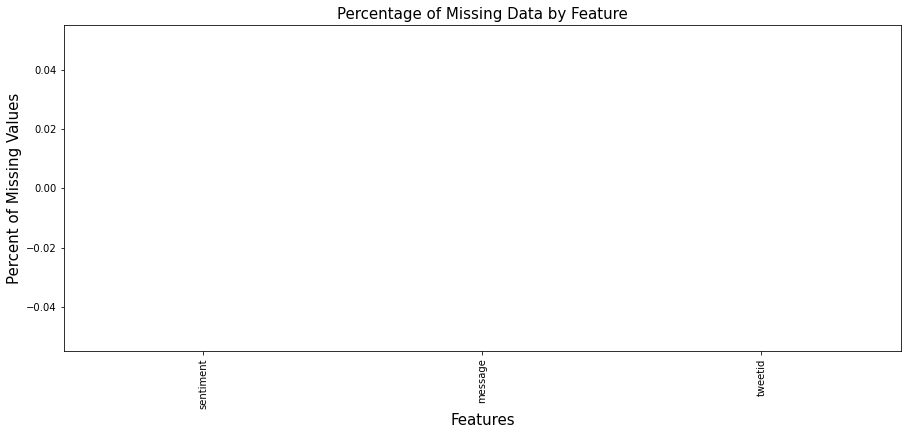

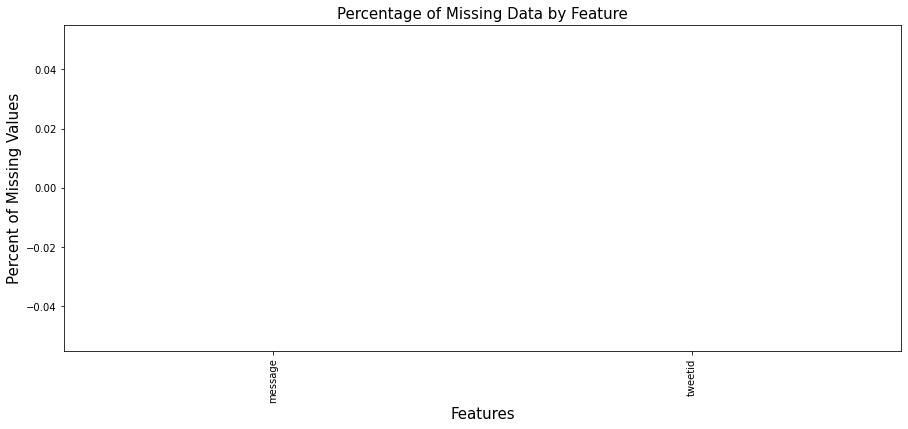

In [18]:
missing_values(train_df)
missing_values(test_df)

#### <u>Percentage of Sentimentals (2,1,0 & -1)

In [19]:
# function to plot the target _ distribution
def target_distribution (train) : 
    fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
    plt.tight_layout()

    train.groupby('sentiment').count()['tweetid'].plot(kind='pie', ax=axes[0], labels=['-1','0','1','2'],autopct='%.0f%%')
    sns.countplot(x=train['sentiment'], hue=train['sentiment'], ax=axes[1])

    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    axes[1].set_xticklabels(['-1','0','1','2'])
    axes[0].tick_params(axis='x', labelsize=15)
    axes[0].tick_params(axis='y', labelsize=15)
    axes[1].tick_params(axis='x', labelsize=15)
    axes[1].tick_params(axis='y', labelsize=15)

    axes[0].set_title('Target Distribution in Training Set', fontsize=13)
    axes[1].set_title('Target Count in Training Set', fontsize=13)

    plt.show()

#### * 54% of our tweets shows that they believe in man-made climate change(Pro = 1)
#### * 23% of our tweets shows the news about man-made climate change(News = 2)
#### * 15% of our tweets shows that they neither believe or do not believe in man-made climate change (Neutral = 0)
#### * 8% of our tweets show that they do not believe in man-made climate change(Anti = -1)

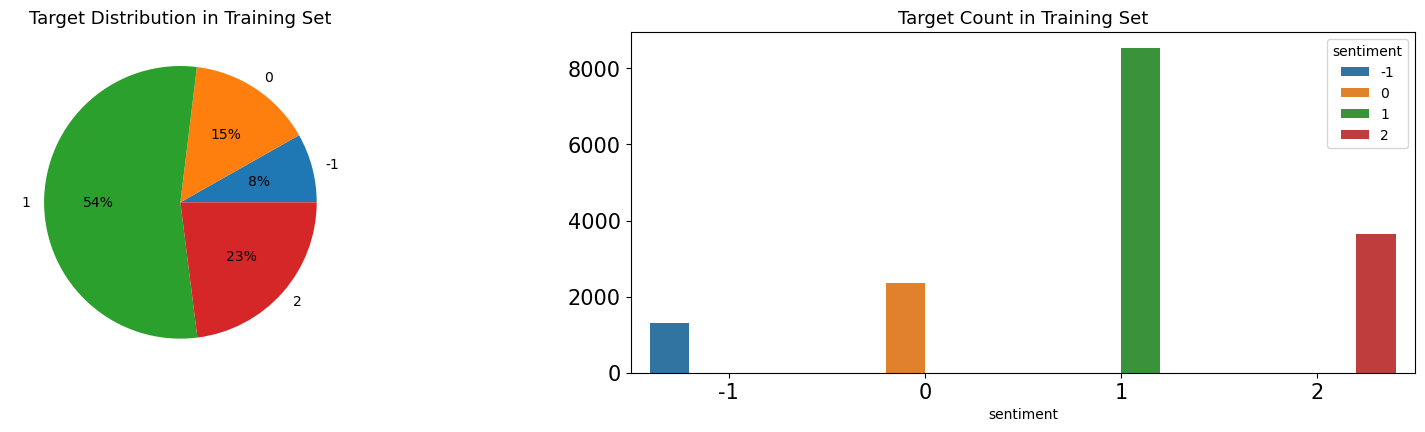

In [20]:
target_distribution(train_df)

#### <u>Character Distribution

In [21]:
# function to plot the caracter _ distribution
def caracter_level_distrubtion (train): 
    fig,((ax1, ax2), (ax3, ax4)) =plt.subplots(2,2,figsize=(15,10))
    
    tweet_len=train[train['sentiment']==2]['message'].str.len() 
    ax1.hist(tweet_len,color='red')
    ax1.set_title('Factual News Tweets')
    
    tweet_len=train[train['sentiment']==1]['message'].str.len()
    ax2.hist(tweet_len,color='green')
    ax2.set_title('1 Pro - Believe in man-made climate change')
    
    tweet_len=train[train['sentiment']==0]['message'].str.len()
    ax3.hist(tweet_len,color='blue')
    ax3.set_title('0 Neutral - Nether supports nor refutes the belief of man-made climate change')
    
    tweet_len=train[train['sentiment']==-1]['message'].str.len()
    ax4.hist(tweet_len,color='purple')
    ax4.set_title('-1 Anti - Does not believe in man-made climate change')
    
    
    fig.suptitle('Characters in tweets')
    plt.show()

#### The distribution of all seems to be almost same. 130 to 140 character length in a tweet are the most common among all sentiments.

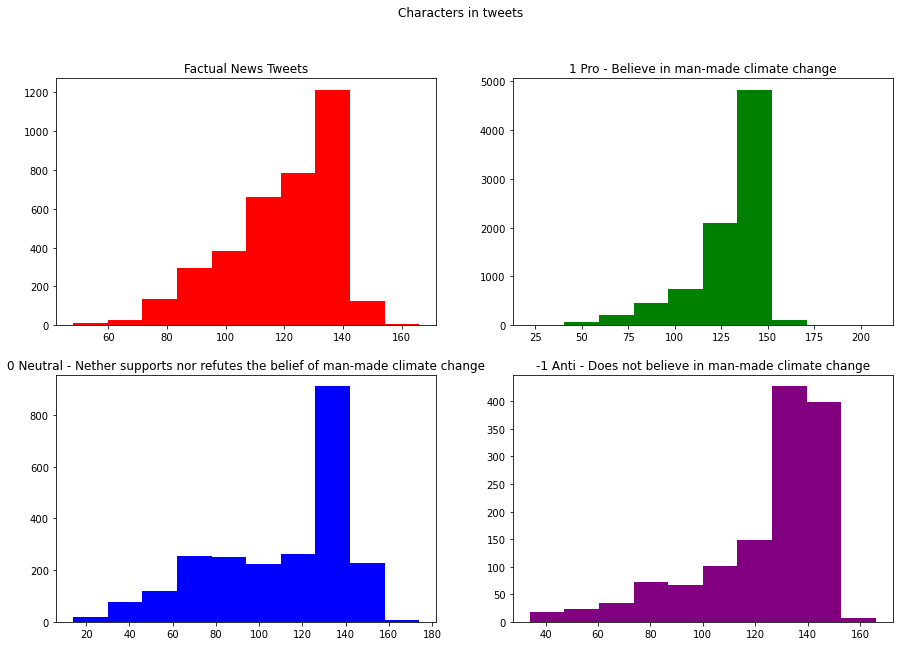

In [22]:
caracter_level_distrubtion(train_df)

In [23]:
# function to plot the word level distrubtion
def word_level_distrubtion (train): 
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,10))
    tweet_len=train[train['sentiment']==2]['message'].str.split().map(lambda x: len(x))
    ax1.hist(tweet_len,color='red')
    ax1.set_title('Factual News Tweets')
    
    tweet_len=train[train['sentiment']==1]['message'].str.split().map(lambda x: len(x))
    ax2.hist(tweet_len,color='green')
    ax2.set_title('1 Pro - Believe in man-made climate change')
    
    tweet_len=train[train['sentiment']==0]['message'].str.split().map(lambda x: len(x))
    ax3.hist(tweet_len,color='blue')
    ax3.set_title('0 Neutral - Nether supports nor refutes the belief of man-made climate change')
    
    tweet_len=train[train['sentiment']==-1]['message'].str.split().map(lambda x: len(x))
    ax4.hist(tweet_len,color='purple')
    ax4.set_title('-1 Anti - Does not believe in man-made climate change')
    
    fig.suptitle('Characters in tweets')
    plt.show()

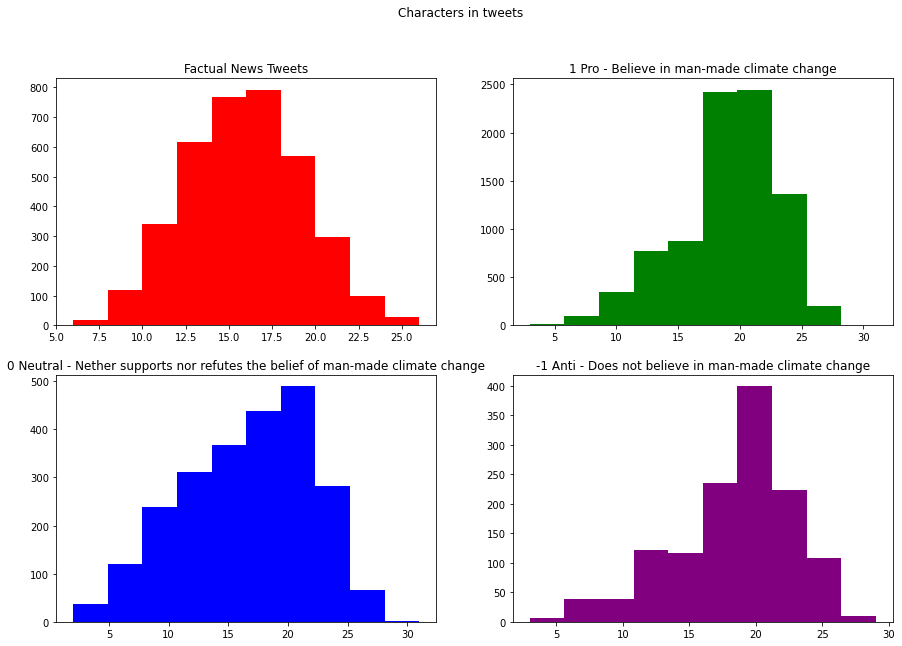

In [24]:
word_level_distrubtion(train_df)

#### <u>Word Cloud

#### Let's plot the word cloud for all for different sentimentals tweets

In [25]:
from wordcloud import WordCloud
def WordCloud_plotting (train): 
    news_tweets = train[train['sentiment']==2]['message']
    Pro_tweets = train[train['sentiment']==1]['message']
    neutral_tweets = train[train['sentiment']==0]['message']
    anti_tweets = train[train['sentiment']==-1]['message']
    
    fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=[26, 16])
    wordcloud1 = WordCloud( background_color='white',
                          width=600,
                          height=400).generate(" ".join(neutral_tweets)) 

    ax1.imshow(wordcloud1)
    ax1.axis('off')
    ax1.set_title('Neutral tweets',fontsize=40);
    # anti
    wordcloud2 = WordCloud( background_color='white',
                          width=600,
                          height=400).generate(" ".join(anti_tweets)) 

    ax2.imshow(wordcloud2)
    ax2.axis('off')
    ax2.set_title('Anti Tweets',fontsize=40)
    #news
    wordcloud3 = WordCloud( background_color='white',
                          width=800,
                          height=400).generate(" ".join(news_tweets)) 

    ax3.imshow(wordcloud3)
    ax3.axis('off')
    ax3.set_title('News Tweets',fontsize=40);
    # pro
    wordcloud4 = WordCloud( background_color='white',
                          width=600,
                          height=400).generate(" ".join(Pro_tweets)) 

    ax4.imshow(wordcloud4)
    ax4.axis('off')
    ax4.set_title('Pro Tweets',fontsize=40);

* **Neutral tweets:** The words like "climate change", "global warming" and "https"
* **Anti Tweets:** Donal Trump appears a lot here. He is probably one of the people who do not believe in global warming. Also words like blame and scam are probably unique in here.
* **News Tweets:** Words like "https" appear a lot. Which probably means the news tweets always reference with a website. 
* **Pro Tweets:** words like "tackle climate","change" are probably unique in here too. 

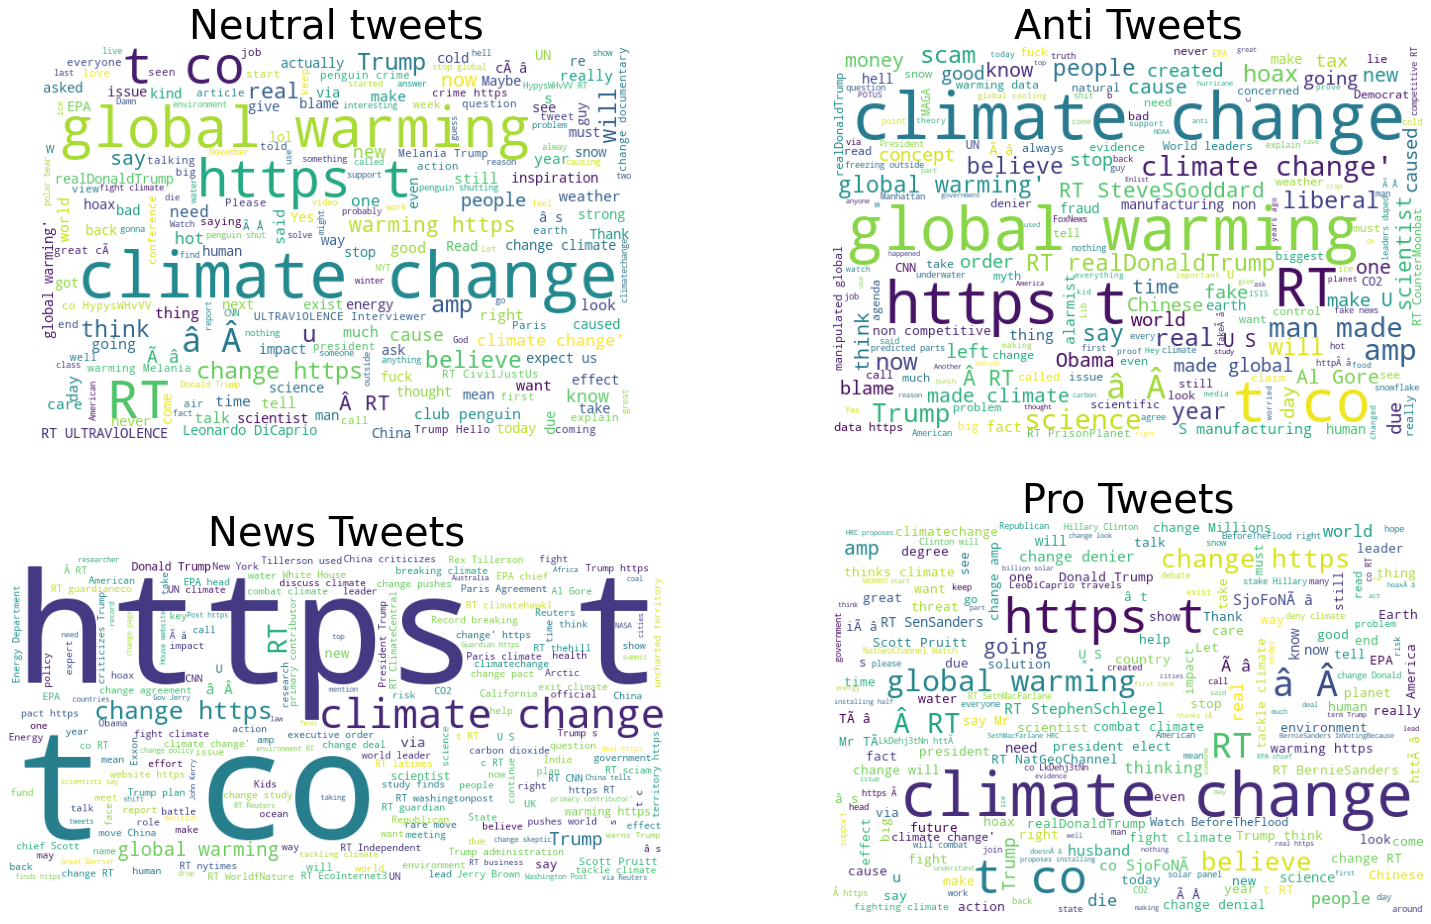

In [26]:
WordCloud_plotting(train_df)

#### <u>Punctuation Frequency

In [27]:
# function to return a dictionnary of punctuation_frequency
def punctuation_frequence(df) : 
    punct =defaultdict(int)
    for word in (List_of_words(df)):
        if word in special:
            punct[word]+=1
    return(punct)

# function to plot a barplot of punctuation
def punct_barplot (punct) : 
    x,y=zip(*punct.items())
    plt.bar(x,y,color='green')

#### The "-" punctuation is used a lot in our tweets then "|" is the second most used.

100%|████████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 337466.85it/s]


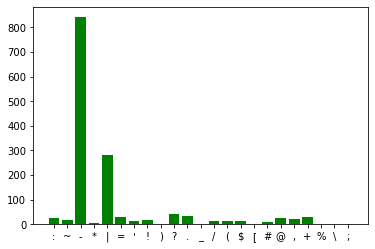

In [28]:
punct = punctuation_frequence(train_df)
punct_barplot(punct)

#### <U>Most Commun Words

In [29]:
# function to return the most common words
def most_common (df):
    counter=Counter(List_of_words(df))
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:70]: 
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x) 

#### "Climate", "RT","change" adn "global" are the most common words from our tweets. This makes sense since it corresponds with our word clouds

100%|████████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 411425.05it/s]


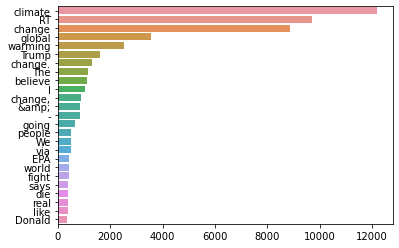

In [30]:
most_common(train_df)

#### <U>Plotting Most Frequent N-grams

In [31]:
# function to return the top n grams tweets
from sklearn.feature_extraction.text import CountVectorizer
def get_top_tweet_ngrams(corpus,n_gram,lenght): 
    vec = CountVectorizer(ngram_range=(n_gram, n_gram)).fit(corpus) 
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
    return words_freq[:lenght]

# function to graph the top n grams tweets
def plotting_top_ngrams (df): 
    plt.figure(figsize=(10,5))
    top_tweet_bigrams=get_top_tweet_ngrams(df['message'],2,10)[:10]
    x,y=map(list,zip(*top_tweet_bigrams))
    sns.barplot(x=y,y=x)

#### Here we just plot the N-grams of our tweets. But for now we will only plot the most common(i.e bigrams). 
#### So from bi-grams diagrams we can see that "climate change" is the most in our tweets.

In [32]:
get_top_tweet_ngrams(List_of_tweets(train_df),2,10)

100%|███████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 1985210.19it/s]


[('climate change', 12557),
 ('https co', 9307),
 ('global warming', 3496),
 ('change https', 2010),
 ('on climate', 1255),
 ('change is', 1102),
 ('of climate', 960),
 ('believe in', 934),
 ('in climate', 858),
 ('about climate', 652)]

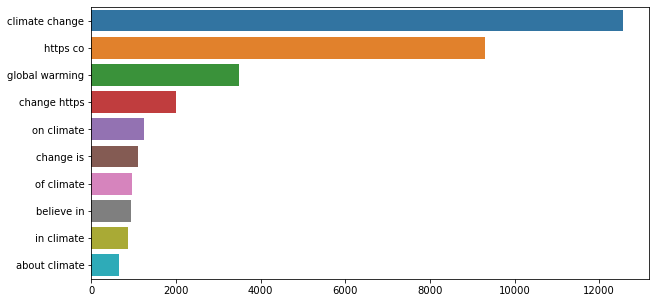

In [33]:
plotting_top_ngrams(train_df)

# ADDING NEW FEATURES

***Meta features The meta features used for the analysis are :*** 

* **word_count:** number of words in text

* **unique_word_count:** number of unique words in text

* **stop_word_count:** number of stop words in text

* **url_count number:** of urls in text

* **mean_word_length:** average character count in words

* **char_count number:** of characters in text

* **punctuation_count:** number of punctuations in text

* **hashtag_count:** number of hashtags (#) in text

* **mention_count:** number of mentions (@) in text

#### Before we create new columns, we will merge our data sets so that we can add our new futures to all data sets(i.e both test and train)

In [34]:
#Combine Train and Test data set
df_all = concat_df(train_df,test_df)

In [35]:
#ALL Functions to create our new features

# word_count
def word_count(df_all) : 
    df_all['word_count'] = df_all['message'].apply(lambda x: len(str(x).split()))

# unique_word_count
def unique_word_count (df_all) : 
    df_all['unique_word_count'] = df_all['message'].apply(lambda x: len(set(str(x).split())))  

# stop_word_count
def stop_word_count (df_all) : 
    df_all['stop_word_count'] = df_all['message'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords.words('english')]))

# url_count
def url_count(df_all) : 
    df_all['url_count'] = df_all['message'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
def mean_word_length (df_all) : 
    df_all['mean_word_length'] = df_all['message'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
def char_count (df_all) :
    df_all['char_count'] = df_all['message'].apply(lambda x: len(str(x)))

# punctuation_count
def punctuation_count (df_all) : 
    df_all['punctuation_count'] = df_all['message'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
def hashtag_count(df_all) : 
    df_all['hashtag_count'] = df_all['message'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
def mention_count(df_all) : 
    df_all['mention_count'] = df_all['message'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [36]:
#We call of them to create our new features
word_count(df_all) 
unique_word_count (df_all)  
stop_word_count (df_all) 
url_count(df_all) 
mean_word_length (df_all) 
char_count (df_all) 
punctuation_count (df_all)
hashtag_count(df_all) 
mention_count(df_all)

#### Then Now we can seperate our combined data set. Seperate it to train and test again. And just confirm if the new features are created

In [37]:
train_df , test_df  =  divide_df(df_all,train_df.shape[0])
train_df

,message,sentiment,tweetid,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",1.0,625221,19,19,3,1,6.421053,140,12,0,1
1,It's not like we lack evidence of anthropogenic global warming,1.0,126103,10,10,4,0,5.300000,62,1,0,0
2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,2.0,698562,19,19,6,2,6.421053,140,12,0,1
3,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,1.0,573736,15,15,5,1,5.666667,99,8,2,0
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",1.0,466954,18,18,6,0,5.833333,122,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15814,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",1.0,22001,22,22,7,1,5.409091,140,11,0,1
15815,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,2.0,17856,13,13,4,1,8.230769,119,10,0,1
15816,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,0.0,384248,19,19,4,1,6.052632,133,9,0,0
15817,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,-1.0,819732,21,20,8,0,5.142857,128,4,1,1


#### <u>boxplot on the added features
Let's do some boxplot in order to have an idea on the added features

In [38]:
def box_plot_for_meta_features (train,f1,f2,f3,f4,f5,f6,f7,f8,f9):
    f, axes = plt.subplots(9, 1, figsize=(10,20))
    sns.boxplot(x='sentiment', y=f1, data=train, ax=axes[0])
    axes[0].set_xlabel('Sentiment', fontsize=10)
    axes[0].set_title("Number of " + f1.split('_')[0] + " in each class", fontsize=8)

    sns.boxplot(x='sentiment', y=f2, data=train, ax=axes[1])
    axes[1].set_xlabel('Sentiment', fontsize=10)
    axes[1].set_title("Number of" + f2.split('_')[0] + "in each class", fontsize=8)

    sns.boxplot(x='sentiment', y=f3, data=train, ax=axes[2])
    axes[2].set_xlabel('Sentiment', fontsize=10)
    axes[2].set_title("Number of " + f3.split('_')[0] + " in each class", fontsize=8)
    
    sns.boxplot(x='sentiment', y=f4, data=train, ax=axes[3])
    axes[3].set_xlabel('Sentiment', fontsize=10)
    axes[3].set_title("Number of " + f4.split('_')[0] + " in each class", fontsize=8)
    
    sns.boxplot(x='sentiment', y=f5, data=train, ax=axes[4])
    axes[4].set_xlabel('Sentiment', fontsize=10)
    axes[4].set_title("Number of " + f5.split('_')[0] + " in each class", fontsize=8)
    
    sns.boxplot(x='sentiment', y=f6, data=train, ax=axes[5])
    axes[5].set_xlabel('Sentiment', fontsize=10)
    axes[5].set_title("Number of " + f6.split('_')[0] + " in each class", fontsize=8)
    
    sns.boxplot(x='sentiment', y=f7, data=train, ax=axes[6])
    axes[6].set_xlabel('Sentiment', fontsize=10)
    axes[6].set_title("Number of " + f7.split('_')[0] + " in each class", fontsize=8)
    
    sns.boxplot(x='sentiment', y=f8, data=train, ax=axes[7])
    axes[7].set_xlabel('Sentiment', fontsize=10)
    axes[7].set_title("Number of " + f8.split('_')[0] + " in each class", fontsize=8)
    
    sns.boxplot(x='sentiment', y=f9, data=train, ax=axes[8])
    axes[8].set_xlabel('Sentiment', fontsize=10)
    axes[8].set_title("Number of " + f9.split('_')[0] + " in each class", fontsize=8)
    
    
    plt.show()

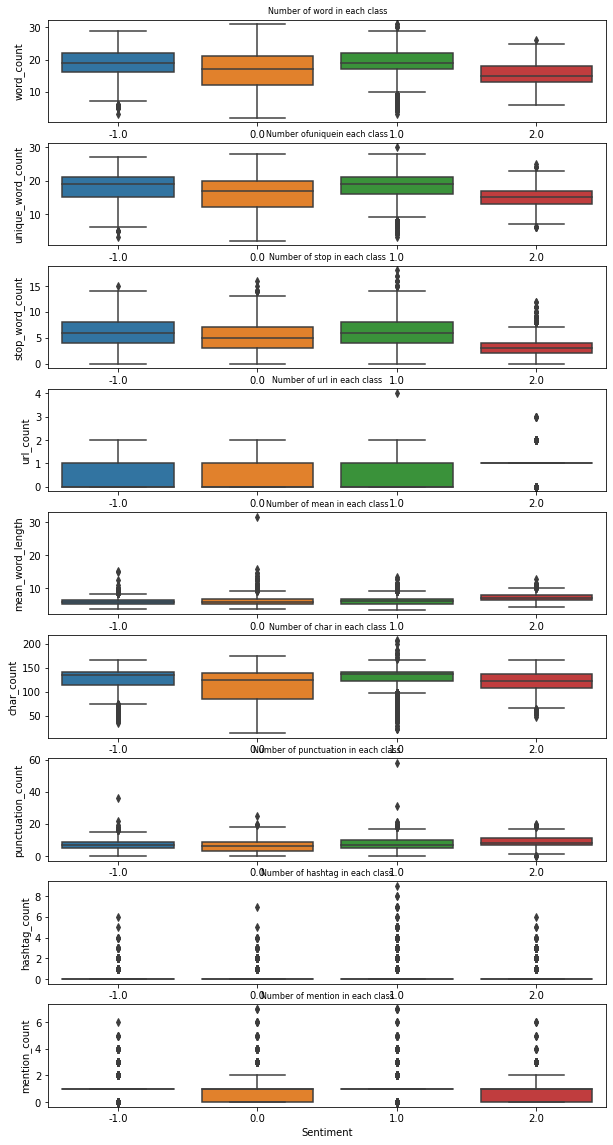

In [39]:
box_plot_for_meta_features(train_df,'word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                           'char_count', 'punctuation_count', 'hashtag_count', 'mention_count')

In [40]:
def plotting_MetaFeatures (train): 
    METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                  'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
    NEWS_TWEETS = train['sentiment'] == 2
    PRO_TWEETS = train['sentiment'] == 1
    NEUTRAL_TWEETS = train['sentiment'] == 0
    ANTI_TWEETS = train['sentiment'] == -1

    fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

    for i, feature in enumerate(METAFEATURES):
        sns.distplot(train.loc[NEWS_TWEETS][feature], label='NEWS_TWEETS', ax=axes[i][0], color='green')
        sns.distplot(train.loc[PRO_TWEETS][feature], label='PRO_TWEETS', ax=axes[i][0], color='red')
        sns.distplot(train.loc[NEUTRAL_TWEETS][feature], label='NEUTRAL_TWEETS', ax=axes[i][0], color='blue')
        sns.distplot(train.loc[ANTI_TWEETS][feature], label='ANTI_TWEETS', ax=axes[i][0], color='yellow')

        sns.distplot(train[feature], label='Training', ax=axes[i][1])
        sns.distplot(test_df[feature], label='Test', ax=axes[i][1])
      
        for j in range(2):
            axes[i][j].set_xlabel('')
            axes[i][j].tick_params(axis='x', labelsize=12)
            axes[i][j].tick_params(axis='y', labelsize=12)
            axes[i][j].legend()
      
        axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
        axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

    plt.show()

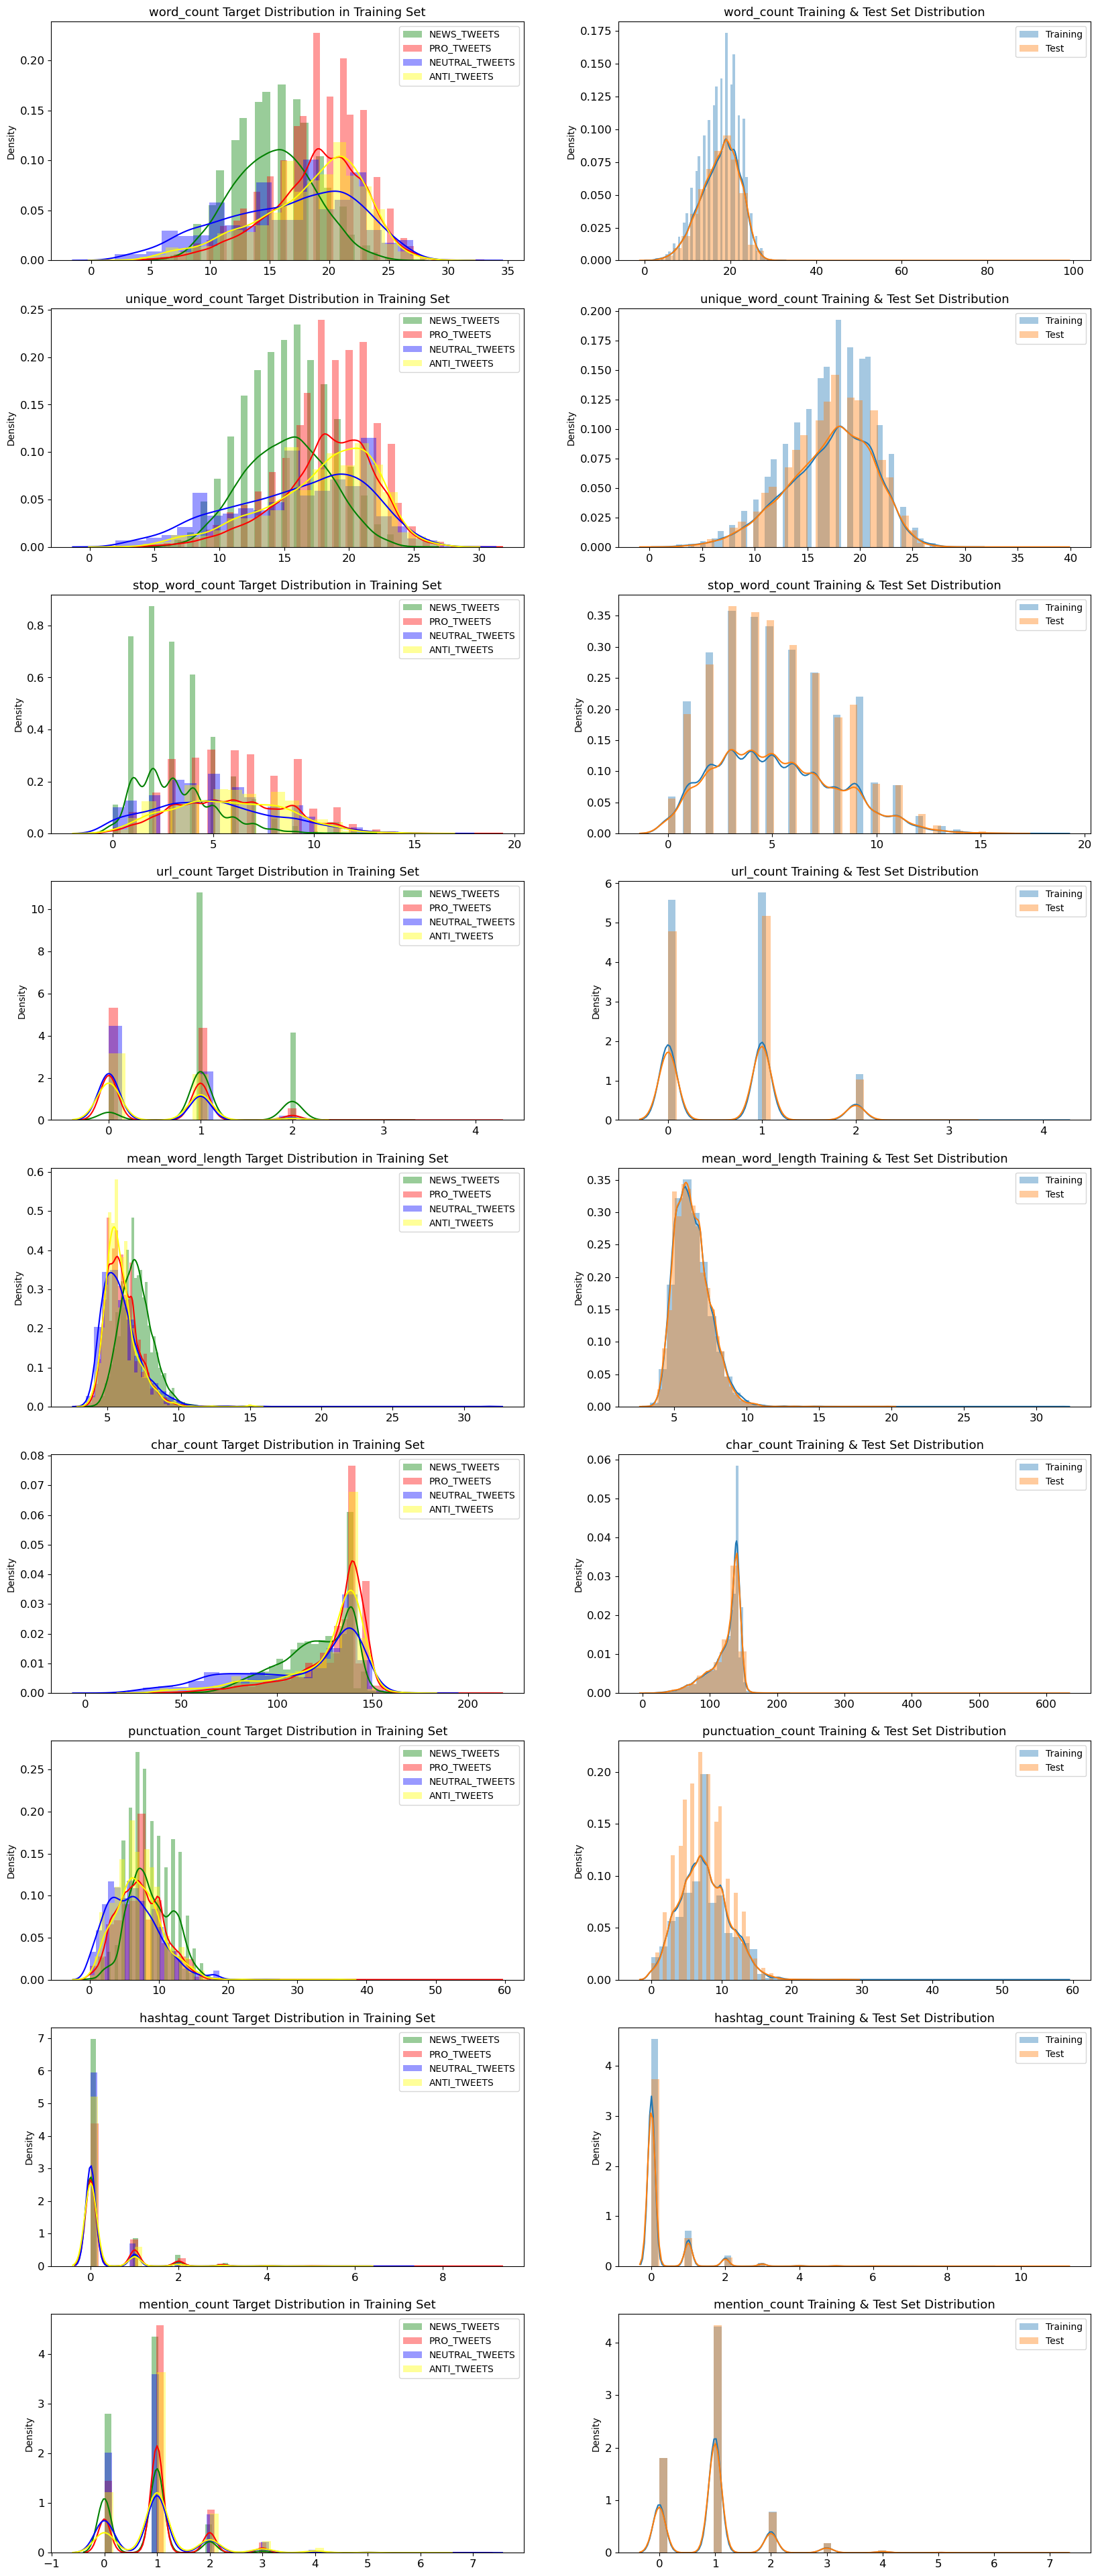

In [41]:
plotting_MetaFeatures(train_df)

All of the meta features have very similar distributions in training and test set which also proves that training and test set are taken from the same sample.

All of the meta features have information about sentiment as well, but some of them are not good enough such as url_count, hashtag_count and mention_count.

On the other hand, word_count, unique_word_count, stop_word_count, mean_word_length, char_count, punctuation_count have very different distributions for Sentiment tweets. Those features might be useful in models

# DATA CLEANING

As we know,twitter tweets always have to be cleaned before we go onto modelling. So we will do some basic cleaning such as removing punctuations,removing html tags and emojis etc. So let's start.

In [42]:
#remove stop words
def remove_stops(text) : 
    remove_stopwords = [w for w in text.split() if w not in stopwords.words('english')]
    return ' '.join(remove_stopwords)

# remove URLs
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# remove htmls
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# remove punct
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

# remove other ...
def remove_other (text) : 
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return(text)


In [43]:
# Full clean ... combination off all the previous functions
def Full_clean (text) : 
    text = remove_stops(text)
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_punct(text)
    text = remove_other (text)
    return(text)

In [ ]:
#remove words less than 1 character
#train['processed_text'] = train['processed_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#test['processed_text'] = test['processed_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))



In [62]:
#df_all['message'] = df_all['message'].apply(lambda x : Full_clean(x))
df_all['message'] = df_all['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df_all

,message,sentiment,tweetid,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,polyscimajor epa chief think carbon dioxide main cause global warming and wait what via mashable,1.0,625221,19,19,3,1,6.421053,140,12,0,1
1,like lack evidence anthropogenic global warming,1.0,126103,10,10,4,0,5.300000,62,1,0,0
2,rawstory researcher say three year act climate change it’s late,2.0,698562,19,19,6,2,6.421053,140,12,0,1
3,todayinmaker wired pivotal year war climate change,1.0,573736,15,15,5,1,5.666667,99,8,2,0
4,soynoviodetodas racist sexist climate change denying bigot leading poll electionnight,1.0,466954,18,18,6,0,5.833333,122,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26360,brittanybohrer brb writing poem climate change climatechange science poetry fakenews alternativefacts,NaN,895714,15,15,2,1,8.400000,140,14,5,1
26361,year climate change came home during hottest year record karl mathiesen travelled tasmania…,NaN,875167,19,17,5,1,6.263158,137,8,0,0
26362,loopvanuatu pacific country positive fiji leading global climate change conference november,NaN,78329,16,16,3,1,7.625000,137,9,0,1
26363,you’re hot must cause global warming aldublaboroflove,NaN,867455,16,16,5,0,5.937500,110,8,1,3


#### Stemmer/Lemmer

In [63]:
# function to stemm the text
def stemming (text) : 
    stemmer = nltk.stem.PorterStemmer()
    return(" ".join(stemmer.stem(word) for word in text.split()))

# function to lemm a text 
def lemming (text) : 
    lemmatizer=nltk.stem.WordNetLemmatizer()
    return(" ".join(lemmatizer.lemmatize(word) for word in text.split()))

Stemming will not convert original words into meaningful words. As you can see “considered” gets stemmed into “condit” which does not have meaning and a spelling mistake too. The better way is to use Lemmatization instead of stemming process.

Lemmatization is a more powerful operation, and it takes into consideration the morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms.

In [64]:
#df_all['message'] = df_all['message'].apply(lambda x : stemming(x))

#So we will choose lemmer
df_all['message'] = df_all['message'].apply(lambda x : lemming(x))


df_all

,message,sentiment,tweetid,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,polyscimajor epa chief think carbon dioxide main cause global warming and wait what via mashable,1.0,625221,19,19,3,1,6.421053,140,12,0,1
1,like lack evidence anthropogenic global warming,1.0,126103,10,10,4,0,5.300000,62,1,0,0
2,rawstory researcher say three year act climate change it’s late,2.0,698562,19,19,6,2,6.421053,140,12,0,1
3,todayinmaker wired pivotal year war climate change,1.0,573736,15,15,5,1,5.666667,99,8,2,0
4,soynoviodetodas racist sexist climate change denying bigot leading poll electionnight,1.0,466954,18,18,6,0,5.833333,122,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26360,brittanybohrer brb writing poem climate change climatechange science poetry fakenews alternativefacts,NaN,895714,15,15,2,1,8.400000,140,14,5,1
26361,year climate change came home during hottest year record karl mathiesen travelled tasmania…,NaN,875167,19,17,5,1,6.263158,137,8,0,0
26362,loopvanuatu pacific country positive fiji leading global climate change conference november,NaN,78329,16,16,3,1,7.625000,137,9,0,1
26363,you’re hot must cause global warming aldublaboroflove,NaN,867455,16,16,5,0,5.937500,110,8,1,3


#### The data clean phase is over. We can now separate the train and test. We use divide_df for that

In [65]:
train_df , test_df = divide_df(df_all,train_df.shape[0])
train_df

,message,sentiment,tweetid,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,polyscimajor epa chief think carbon dioxide main cause global warming and wait what via mashable,1.0,625221,19,19,3,1,6.421053,140,12,0,1
1,like lack evidence anthropogenic global warming,1.0,126103,10,10,4,0,5.300000,62,1,0,0
2,rawstory researcher say three year act climate change it’s late,2.0,698562,19,19,6,2,6.421053,140,12,0,1
3,todayinmaker wired pivotal year war climate change,1.0,573736,15,15,5,1,5.666667,99,8,2,0
4,soynoviodetodas racist sexist climate change denying bigot leading poll electionnight,1.0,466954,18,18,6,0,5.833333,122,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15814,ezlusztig they took material global warming lgbt right health care but theyre hocking melanias qvc,1.0,22001,22,22,7,1,5.409091,140,11,0,1
15815,washingtonpost how climate change could breaking relationship,2.0,17856,13,13,4,1,8.230769,119,10,0,1
15816,notiven nytimesworld what trump actually believe climate change rick perry join aide,0.0,384248,19,19,4,1,6.052632,133,9,0,0
15817,hey liberal climate change crap hoax tie the climate being changed byã¢â‚¬â¦,-1.0,819732,21,20,8,0,5.142857,128,4,1,1


# <u>Spitting Our Dataset into Training And Testing Dataset

In [66]:
train,valid = train_test_split(train_df,test_size = 0.2,random_state=0,stratify = train_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

print("train shape : ", train)
print("valid shape : ", valid)

train shape :                                                                                                         message  \
749    babysnitchery guess everyone high key know climate change real people give shit bout ruining planet to…   
9796                                         stephenschlegel thinking going die husband believe climate change   
11331                                                     taniel lvburke the russian wait blame global warming   
9657                                     uspressworld what trump executive order climate change mean world cnn   
7868     berniesanders the concept global warming created chinese order make manufacturing noncompetitiã¢â‚¬â¦   
...                                                                                                        ...   
9047              stephenlautens the rebel caught lying journalist climate change thats character thx aã¢â‚¬â¦   
13214                              guardianeco fact matter climate change

# <u>FEATURE EXTRACTORS

#### The data clean phase is over. We can now separate the train and test. We use divide_df for that

### We can then proceed to the feature extraction phase. We will use 1 Feature extractors :¶
* Tokenizer or CountVectorizer or Tfidf


#### CountVectorizer

#### Use Of Counter Vectorize

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.message.values)
X_test = vectorizer.transform(valid.message.values)


X_test_data = test_df['message']#test dataset
XT = vectorizer.transform(X_test_data.values)

y_train = train.sentiment.values
y_test = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)
print("XT.shape : ", XT.shape)

X_train.shape :  (12655, 18615)
X_test.shape :  (3164, 18615)
y_train.shape :  (12655,)
y_test.shape :  (3164,)
XT.shape :  (10546, 18615)


In [87]:
t,v = train_test_split(train_df,test_size = 0.2,random_state=0,stratify = train_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.


# function to return a fitted countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
def countvectorizer (train) : 
    count_vectorizer = CountVectorizer() 
    count_vectorizer.fit(List_of_tweets(train))
    return  count_vectorizer



# function to prepare matrix with countvectorizer
def preparing_matrix_countvectorizer (count_vectorizer):
    train_matrix = count_vectorizer.transform(List_of_tweets(t))
    v_matrix = count_vectorizer.transform(List_of_tweets(v))
    test_matrix = count_vectorizer.transform(List_of_tweets(test_df))
    return train_matrix.toarray(),v_matrix.toarray() , test_matrix.toarray()

In [92]:
count_vectorizer = countvectorizer(t)

train_matrix, v_matrix , test_matrix = preparing_matrix_countvectorizer(count_vectorizer)

y_train = t.sentiment.values
y_test = v.sentiment.values

100%|███████████████████████████████████████████████████████████████████████| 10546/10546 [00:00<00:00, 1321812.39it/s]


# <u>MODEL(S)

# <u>1. Naive Bayes Classifier

In [94]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = f1_score(y_test,NB_prediction, average='weighted')

print("training accuracy Score: ", naiveByes_clf.score(train_matrix,y_train))
print("Testing accuracy Score : ", NB_accuracy )

print(classification_report(NB_prediction,y_test))

training accuracy Score:  0.8550770446463848
Testing accuracy Score :  0.6745899724240151
              precision    recall  f1-score   support

        -1.0       0.27      0.86      0.41        81
         0.0       0.22      0.72      0.33       141
         1.0       0.92      0.69      0.79      2279
         2.0       0.69      0.76      0.72       663

    accuracy                           0.71      3164
   macro avg       0.52      0.76      0.56      3164
weighted avg       0.82      0.71      0.74      3164



# <u>2. Stochastic Gradient Descent-SGD Classifier 

In [95]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=42)

sgd_clf.fit(train_matrix,y_train)

sgd_prediction = sgd_clf.predict(v_matrix)
sgd_accuracy = f1_score(y_test,sgd_prediction, average='weighted')

print("Training accuracy Score    : ",sgd_clf.score(train_matrix,y_train))
print("Testing accuracy Score : ",sgd_accuracy )

print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9771631766100356
Testing accuracy Score :  0.7164260784552406
              precision    recall  f1-score   support

        -1.0       0.49      0.65      0.56       198
         0.0       0.38      0.56      0.46       321
         1.0       0.85      0.76      0.80      1914
         2.0       0.74      0.74      0.74       731

    accuracy                           0.73      3164
   macro avg       0.62      0.68      0.64      3164
weighted avg       0.76      0.73      0.74      3164



# <u>3. RANDOM FOREST CLASSIFIER

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(train_matrix,y_train)

rf_prediction = rf_clf.predict(v_matrix)
rf_accuracy = f1_score(y_test,rf_prediction, average='weighted')

print("Training accuracy Score    : ",rf_clf.score(train_matrix,y_train))
print("Testing accuracy Score : ",rf_accuracy )

print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9986566574476492
Testing accuracy Score :  0.6958975723438772
              precision    recall  f1-score   support

        -1.0       0.31      0.75      0.43       106
         0.0       0.36      0.66      0.47       258
         1.0       0.87      0.72      0.79      2069
         2.0       0.72      0.72      0.72       731

    accuracy                           0.72      3164
   macro avg       0.57      0.71      0.60      3164
weighted avg       0.78      0.72      0.73      3164



# <u>4. Extreme Gradient Boosting

In [97]:
xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(train_matrix, y_train)

xgb_prediction = xgboost_clf.predict(v_matrix)
xgb_accuracy = f1_score(y_test,xgb_prediction, average='weighted')

print("Training accuracy Score    : ",xgboost_clf.score(train_matrix,y_train))
print("Testing accuracy Score : ",xgb_accuracy )

print(classification_report(xgb_prediction,y_test))

[00:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.7657842749901225
Testing accuracy Score :  0.6780506243140244
              precision    recall  f1-score   support

        -1.0       0.37      0.81      0.51       119
         0.0       0.29      0.64      0.40       213
         1.0       0.91      0.69      0.79      2242
         2.0       0.60      0.75      0.67       590

    accuracy                           0.70      3164
   macro avg       0.54      0.72      0.59      3164
weighted avg       0.79      0.70      0.73      3164



# <u> 5. Support Vector Machine

In [98]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(train_matrix, y_train)

svc_prediction = svc.predict(v_matrix)
svc_accuracy = f1_score(y_test,svc_prediction, average='weighted')

print("Training accuracy Score    : ",svc.score(train_matrix,y_train))
print("Testing accuracy Score : ",svc_accuracy )

print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9116554721453971
Testing accuracy Score :  0.704607976474123
              precision    recall  f1-score   support

        -1.0       0.28      0.91      0.43        80
         0.0       0.35      0.71      0.47       231
         1.0       0.90      0.72      0.80      2136
         2.0       0.72      0.74      0.73       717

    accuracy                           0.73      3164
   macro avg       0.56      0.77      0.61      3164
weighted avg       0.81      0.73      0.75      3164



# <u>6. Logistic Regression 

In [99]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(train_matrix, y_train)

logreg_prediction = logreg.predict(v_matrix)
logreg_accuracy = f1_score(y_test,logreg_prediction, average='weighted')

print("Training accuracy Score    : ",logreg.score(train_matrix,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9686290003951008
Testing accuracy Score :  0.7239588027277309
              precision    recall  f1-score   support

        -1.0       0.44      0.77      0.56       149
         0.0       0.42      0.59      0.49       336
         1.0       0.86      0.76      0.81      1940
         2.0       0.74      0.73      0.74       739

    accuracy                           0.73      3164
   macro avg       0.62      0.71      0.65      3164
weighted avg       0.77      0.73      0.75      3164



# <u> 7.CATBOOST MODEL 

In [100]:
#takes huge amount of time to execute

from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

clf2 = CatBoostClassifier()


clf2.fit(train_matrix, y_train,  
        eval_set=(v_matrix, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [101]:
catboost_prediction = clf2.predict(v_matrix)
catboost_accuracy = f1_score(y_test,catboost_prediction, average='weighted')
print("Training accuracy Score    : ",clf2.score(train_matrix,y_train))
print("Testing accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

Training accuracy Score    :  0.7250098775187673
Testing accuracy Score :  0.6505482089107051
              precision    recall  f1-score   support

        -1.0       0.32      0.85      0.46        96
         0.0       0.25      0.64      0.36       185
         1.0       0.92      0.67      0.77      2353
         2.0       0.54      0.74      0.62       530

    accuracy                           0.68      3164
   macro avg       0.51      0.72      0.55      3164
weighted avg       0.80      0.68      0.71      3164



# <u>All the multiclass models test accuracy in descending order

In [102]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.723959
4,Stochastic Gradient Decent,0.716426
0,Support Vector Machines,0.704608
2,Random Forest,0.695898
5,XGBoost,0.678051
3,Naive Bayes,0.674590
6,CatBoost,0.650548


# <u>Create A Submission File

# create submission dataframe

submission
# save DataFrame to csv file for submission
submission.to_csv("submission.csv", index=False)

In [103]:
test_pred = logreg.predict(test_matrix)

test_pred_int = test_pred.astype(np.int)

test_df['sentiment'] = test_pred_int

submission = test_df[['tweetid','sentiment']]
submission.to_csv('submission.csv', index=False) # writing data to a CSV file
submission


,tweetid,sentiment
15819,169760,1
15820,35326,1
15821,224985,1
15822,476263,1
15823,872928,1
...,...,...
26360,895714,1
26361,875167,1
26362,78329,2
26363,867455,0


In [104]:
# function to plot the target _ distribution
def target_distribution (train) : 
    fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
    plt.tight_layout()

    train.groupby('sentiment').count()['tweetid'].plot(kind='pie', ax=axes[0], labels=['-1','0','1','2'],autopct='%.0f%%')
    sns.countplot(x=train['sentiment'], hue=train['sentiment'], ax=axes[1])

    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    axes[1].set_xticklabels(['-1','0','1','2'])
    axes[0].tick_params(axis='x', labelsize=15)
    axes[0].tick_params(axis='y', labelsize=15)
    axes[1].tick_params(axis='x', labelsize=15)
    axes[1].tick_params(axis='y', labelsize=15)

    axes[0].set_title('Target Distribution in Training Set', fontsize=13)
    axes[1].set_title('Target Count in Training Set', fontsize=13)

    plt.show()

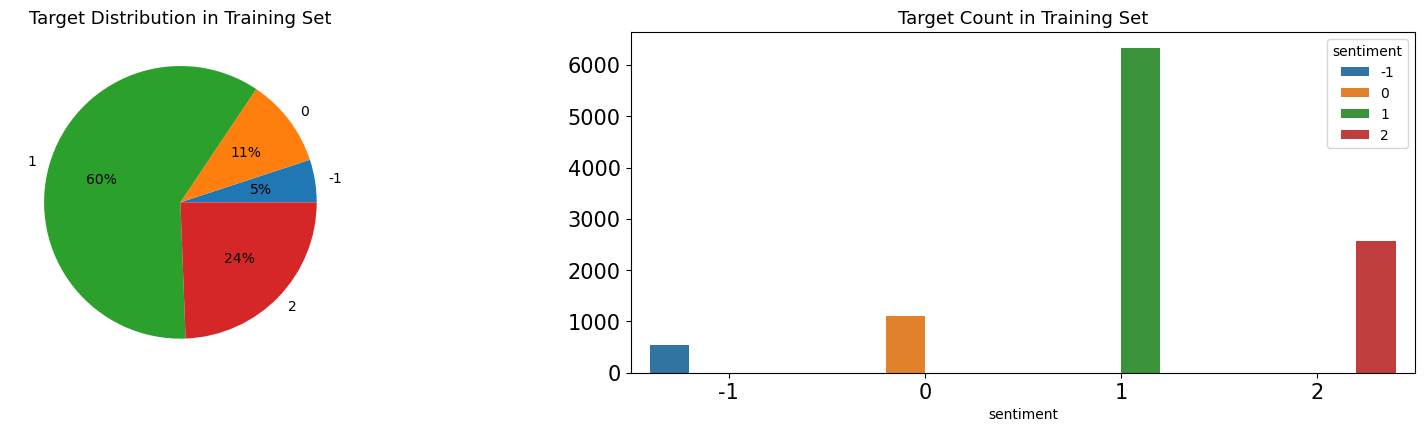

In [105]:
target_distribution(submission)